<br>
<br>
<H1>Deep Learning for Students Performance in Exams</H1>

![](https://images.pexels.com/photos/159775/library-la-trobe-study-students-159775.jpeg?cs=srgb&dl=pexels-pixabay-159775.jpg&fm=jpg)

<H2>Abstract</H2>
    
This lab is dedicated to application of an advanced analysis of students performance.

<H2>Features:</H2>

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
2 sex - student's sex (binary: 'F' - female or 'M' - male)<br>
3 age - student's age (numeric: from 15 to 22)<br>
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)<br>
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)<br>
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
16 schoolsup - extra educational support (binary: yes or no)<br>
17 famsup - family educational support (binary: yes or no)<br>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
19 activities - extra-curricular activities (binary: yes or no)<br>
20 nursery - attended nursery school (binary: yes or no)<br>
21 higher - wants to take higher education (binary: yes or no)<br>
22 internet - Internet access at home (binary: yes or no)<br>
23 romantic - with a romantic relationship (binary: yes or no)<br>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
29 health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
30 absences - number of school absences (numeric: from 0 to 93)<br>

<H2>Grades (Targets):</H2>

31 G1 - first period grade (numeric: from 0 to 20)<br>
31 G2 - second period grade (numeric: from 0 to 20)<br>
32 G3 - final grade (numeric: from 0 to 20, output target)<br>



<H2>Introduction</H2>
    
Grades are widely used in the educational system as a way to measure the performance and knowledge of students. Usualy used to progress in an institution or to get into one.

This lab will show you how to upload a dataset from Kaggle (the original dataset is from https://archive.ics.uci.edu/ml/datasets/student+performance), transform them, and determine the basic features that may have influence on grades.

We will use some visualization tools to measure the impact of the some features. Deep learning and TensorFlow to forecasting the grades.

<H2>Objectives</H2>

Create visualization if the features and the grades.

Prepare the features and the targets for the learning process.

Build a classification using Keras, TensorFlow.

The Notebook will be uploaded to Kaggle and Github.

<H2>Required libraries import</H2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import opendatasets as od
import os
import category_encoders as ce
from sklearn.preprocessing import LabelBinarizer


%matplotlib inline

## Extracting and Loading the Data

Data was first downloaded from kaggle and saved in my private machine.

In [2]:
#!pip install opendatasets

In [3]:
od.download("https://www.kaggle.com/datasets/dipam7/student-grade-prediction", force=False)

Skipping, found downloaded files in ".\student-grade-prediction" (use force=True to force download)


In [4]:
os.listdir((r'C:\Users\User\student-grade-prediction'))

['student-mat.csv']

In [5]:
df = pd.read_csv(r'C:\Users\User\student-grade-prediction\student-mat.csv')

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Checking the data

Looking for null values and the type of the data

In [7]:
df.isnull().sum()/df.count()*100

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

The dataset has no null values

In [8]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

We have some categorical data. Later we'll have to turn then to numerical.

<h2 id="discriptive_statistics">Descriptive Statistical Analysis</h2>

<p>Let's take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [9]:
df[['G1','G2','G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


<h3>Defininh the targets</h3>

<p>The data have 3 grades (G1, G2, G3), We'll use the mean of the 3.</p>

In [10]:
df['Total_score']=(df['G1']+df['G2']+df['G3'])/3
df = df.drop(['G1','G2','G3'], axis = 1)

<h2> Let's prepare the data</h2>
<h2 id="binning">Binning</h2>

    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.


<p>In our dataset, all the grades are real valued that may range from 0 to 100. It would be much more simpler to separate the value into categories.

We will use 'for loop' to segment the 'scores' columns into 4 bins.</p>
    
Let's bin as follows:

<ul>
    <li>0 will be below average</li>
    <li>1 will be above average</li>

<ul>

In [11]:
df['Total_class'] = 'none'
i = 0
for loop in range (df.shape[0]):
    if 11 <= df["Total_score"][i] <= 20:
        df['Total_class'][i] = 1
    elif 0 <= df["Total_score"][i] < 11:
        df['Total_class'][i] = 0
    i += 1

C:\Users\User\AppData\Local\Temp\ipykernel_8868\2154474530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_class'][i] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_8868\2154474530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_class'][i] = 1


In [12]:
df['Total_class'].value_counts() 

0    203
1    192
Name: Total_class, dtype: int64

<h2 id="indicator">Categorical features</h2>

<p>
    Some of the features in the dataset is categorical, they are in a object type, like sex has two unique values: "M" or "F". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "sex" to indicator variables.
</p>

<p>
    The pandas' method 'TargetEncoder' will assign numerical values of all features.
</p>

In [13]:
df_visualization = df.copy()

In [14]:
tenc=ce.TargetEncoder() 
df_new = tenc.fit_transform(df[['sex','famsize','Pstatus','Mjob','Fjob','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic', 'school', 'address', 'reason', 'guardian']],df['Total_class'])
df = df.drop(['sex','famsize','Pstatus','Mjob','Fjob','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic', 'school', 'address', 'reason', 'guardian'], axis = 1)
df = pd.concat([df_new, df], axis=1 )

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [15]:
#df = df.drop(["Total_score"], axis = 1)
df['Total_class'].value_counts()

0    203
1    192
Name: Total_class, dtype: int64

In [16]:
df['Total_class'] = df['Total_class'].astype(int)

In [17]:
df.head()

,sex,famsize,Pstatus,Mjob,Fjob,schoolsup,famsup,paid,activities,nursery,...,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Total_score,Total_class
0,0.442308,0.459075,0.560976,0.322034,0.655172,0.235294,0.516340,0.462617,0.479381,0.493631,...,0,4,3,4,1,1,3,6,5.666667,0
1,0.442308,0.459075,0.477401,0.322034,0.470046,0.523256,0.466942,0.462617,0.479381,0.456790,...,0,5,3,3,1,1,3,4,5.333333,0
2,0.442308,0.552632,0.477401,0.322034,0.470046,0.235294,0.516340,0.513812,0.479381,0.493631,...,3,4,3,2,2,3,3,10,8.333333,0
3,0.442308,0.459075,0.477401,0.647059,0.459459,0.523256,0.466942,0.513812,0.492537,0.493631,...,0,3,2,2,1,1,5,2,14.666667,1
4,0.442308,0.459075,0.477401,0.439716,0.470046,0.523256,0.466942,0.513812,0.479381,0.493631,...,0,4,3,2,1,2,5,4,8.666667,0


<h3>Comparing the features and the average values</h3>

<p>Now lets compare some features with the average values using boxplots.</p>
<p>There are a lot of features, so let select 5 that have the highest correlation. We'll need to prepare the data first</p>

In [18]:
df_corr = df.corr()
df_corr['Total_score'].sort_values().to_frame()

,Total_score
failures,-0.375759
goout,-0.154511
age,-0.134589
traveltime,-0.128197
romantic,-0.102731
Walc,-0.088025
health,-0.080380
Dalc,-0.072508
absences,-0.005909
freetime,0.003773


In [19]:
dfcopy = df.copy()

In [20]:
dfcopy['Pjob'] = dfcopy['Mjob']+dfcopy['Fjob']
dfcopy = dfcopy.drop(['Mjob', 'Fjob'], axis = 1)

dfcopy['Support'] = dfcopy['schoolsup']+dfcopy['famsup']
dfcopy = dfcopy.drop(['schoolsup', 'famsup'], axis = 1)

dfcopy['SAR'] = dfcopy['school']+dfcopy['address']+dfcopy['reason']
dfcopy = dfcopy.drop(['school', 'address', 'reason'], axis = 1)

dfcopy['pstatusQuar'] = dfcopy['Pstatus']+dfcopy['guardian']
dfcopy = dfcopy.drop(['Pstatus', 'guardian'], axis = 1)

dfcopy['ParEdu'] = dfcopy['Medu']+dfcopy['Fedu']
dfcopy = dfcopy.drop(['Medu', 'Fedu'], axis = 1)

dfcopy['absencefree'] = dfcopy['absences']+dfcopy['freetime']
dfcopy = dfcopy.drop(['absences', 'freetime'], axis = 1)

dfcopy['paidHigher'] = dfcopy['higher']+dfcopy['paid']
dfcopy = dfcopy.drop(['higher', 'paid'], axis = 1)

dfcopy['travelgoout'] = dfcopy['goout']+dfcopy['traveltime']
dfcopy = dfcopy.drop(['goout', 'traveltime'], axis = 1)

dfcopy['actfamsize'] = dfcopy['activities']+dfcopy['famsize']
dfcopy = dfcopy.drop(['activities', 'famsize'], axis = 1)

In [21]:
df_corr = dfcopy.corr()
df_corr['Total_class'].sort_values().to_frame()

,Total_class
failures,-0.294364
travelgoout,-0.175105
Walc,-0.101988
Dalc,-0.070343
age,-0.070234
famrel,-0.052638
absencefree,-0.042630
health,-0.019883
romantic,0.008998
nursery,0.029760


<h3>"Failures"</h3>

Let's look at the relationship between "Failures" and "Total Score".

<AxesSubplot:xlabel='failures', ylabel='Total_score'>

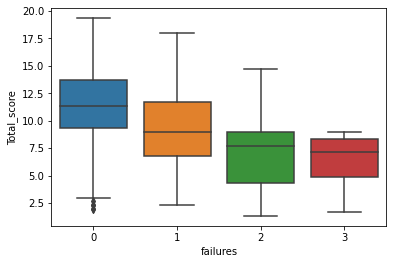

In [22]:
sns.boxplot(x='failures', y='Total_score',data=df_visualization)

In [23]:
df_testgendermath = df_visualization[['failures','Total_score']]
grouped_test = df_testgendermath.groupby(['failures'],as_index=False).mean()
grouped_test

,failures,Total_score
0,0,11.356838
1,1,8.980000
2,2,7.313725
3,3,6.354167


Accordingly with the data, males tend to have math score a litle above the average of 66.089, and females a litle below.

<h3>"Mjob" - Mother's Job</h3>

The relationship between "Mjob" and "Total Score".

<AxesSubplot:xlabel='Mjob', ylabel='Total_score'>

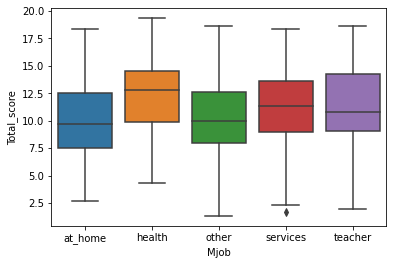

In [24]:
sns.boxplot(x="Mjob", y="Total_score", data=df_visualization)

In [25]:
df_testgenderread = df_visualization[['Mjob','Total_score']]
grouped_test1 = df_testgenderread.groupby(['Mjob'],as_index=False).mean()
grouped_test1

,Mjob,Total_score
0,at_home,9.762712
1,health,12.235294
2,other,10.059102
3,services,11.207120
4,teacher,11.270115


Accordingly with the data, females tend to have math score a litle above the average of 69.169000, and males a litle below.

<h3>"Schoolsup" - School Support</h3>

The relationship between "choolsup" and "Total Score".

<AxesSubplot:xlabel='schoolsup', ylabel='Total_score'>

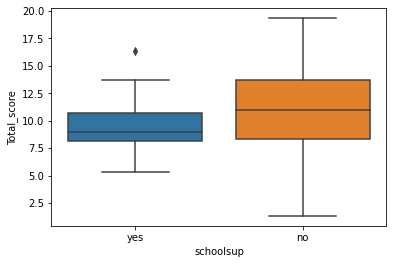

In [26]:
sns.boxplot(x="schoolsup", y="Total_score", data=df_visualization)

In [27]:
df_testgenderwrite = df_visualization[['schoolsup','Total_score']]
grouped_test1 = df_testgenderwrite.groupby(['schoolsup'],as_index=False).mean()
grouped_test1

,schoolsup,Total_score
0,no,10.875000
1,yes,9.359477


Accordingly with the data, females tend to have math score a litle above the average of 68.054000, and males a litle below.

For the case of gender, accordingly with the data, males tend to perform better in math only, reading and writing, are perfomed best by females, might be because it is correlated disciplines.

<h3>"Medu" - Mother's Education</h3>

Let's look at the relationship between "Medu" and "Total Score".

<AxesSubplot:xlabel='Medu', ylabel='Total_score'>

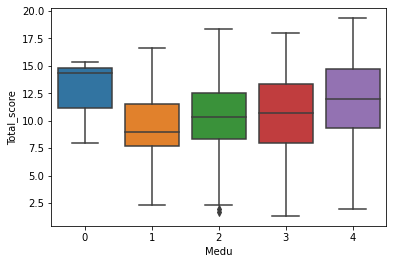

In [28]:
sns.boxplot(x="Medu", y="Total_score", data=df_visualization)

In [29]:
df_ethnricity_math = df_visualization[['Medu','Total_score']]
grouped_ethnricity_math = df_ethnricity_math.groupby(['Medu'],as_index=False).mean()
grouped_ethnricity_math

,Medu,Total_score
0,0,12.555556
1,1,9.197740
2,2,10.216828
3,3,10.451178
4,4,11.839695


Accordingly with the data, Group E tend to have math score above the average of 66.089, Group D in aa litle above average and the rest is below.

<h3>"Fedu" - Father's Education</h3>

Let's look at the relationship between "Fedu" and "Total Score".

<AxesSubplot:xlabel='Fedu', ylabel='Total_score'>

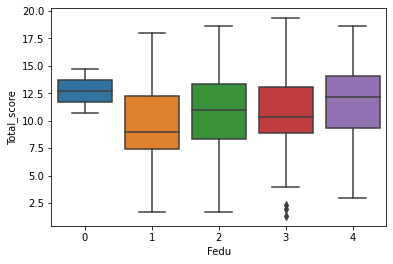

In [30]:
sns.boxplot(x="Fedu", y="Total_score", data=df_visualization)

In [31]:
df_ethnricity_read = df_visualization[['Fedu','Total_score']]
grouped_ethnricity_read = df_ethnricity_read.groupby(['Fedu'],as_index=False).mean()
grouped_ethnricity_read

,Fedu,Total_score
0,0,12.666667
1,1,9.426829
2,2,10.721739
3,3,10.716667
4,4,11.618056


Accordingly with the data Group E performs better in reading, Group E, D, C and B have reading score above the average of 66.089. Group A is below.

In "writing score" we got outliers too, the 'male', the Group "A", the none in "test preparation course".

As we can see, outliers is a very common aspect for this dataset, not surprising when talking about education, maybe more data should be more suitable.

<h2>Starting with Math</h2>

<h2 id="Creating Datasets">Creating the Training and Test Datasets</h2>

The first couple of lines creates arrays of independent (x) and dependent (y) variables, respectively. The third line splits the data into training and test datasets, with 30% of the observations in the test set. The fourth line of code prints the shape of the training set (700 observations of 17 variables) and test set (300 observations of 17 variables).
<br><br>
Lets start with Math

In [32]:
df.head()

,sex,famsize,Pstatus,Mjob,Fjob,schoolsup,famsup,paid,activities,nursery,...,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Total_score,Total_class
0,0.442308,0.459075,0.560976,0.322034,0.655172,0.235294,0.516340,0.462617,0.479381,0.493631,...,0,4,3,4,1,1,3,6,5.666667,0
1,0.442308,0.459075,0.477401,0.322034,0.470046,0.523256,0.466942,0.462617,0.479381,0.456790,...,0,5,3,3,1,1,3,4,5.333333,0
2,0.442308,0.552632,0.477401,0.322034,0.470046,0.235294,0.516340,0.513812,0.479381,0.493631,...,3,4,3,2,2,3,3,10,8.333333,0
3,0.442308,0.459075,0.477401,0.647059,0.459459,0.523256,0.466942,0.513812,0.492537,0.493631,...,0,3,2,2,1,1,5,2,14.666667,1
4,0.442308,0.459075,0.477401,0.439716,0.470046,0.523256,0.466942,0.513812,0.479381,0.493631,...,0,4,3,2,1,2,5,4,8.666667,0


In [34]:
#df = df.drop(['Total_score'], axis = 1)
dfcopy = dfcopy.drop(['Total_score'], axis = 1)

KeyError: "['Total_score'] not found in axis"

In [35]:
y = LabelBinarizer().fit_transform(dfcopy.Total_class)
y.shape

(395, 1)

In [38]:
X = dfcopy[['failures','travelgoout','Walc','Dalc','age','pstatusQuar','studytime','internet','actfamsize','sex','paidHigher','SAR','ParEdu','Support','Pjob']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=40)
print(X_train.shape); print(X_test.shape)

(355, 15)
(40, 15)


<h2 id="Define">Define, Compile, and Fit the Keras Classification Model</h2>

First we set up the model. The first line of code calls for the Sequential constructor. We are using the Sequential model because our network consists of a linear stack of layers.

The second line of code represents the input layer which are our dimensions, we have 17 inputs. Then we repeat the same process in the third and fourth line of codes for the two hidden layers, but this time without the input_dim parameter. The activation function used is a rectified linear unit, or ReLU. ReLU is the most widely used activation function because it is nonlinear, and has the ability to not activate all the neurons at the same time.

The fifth line of code creates the output layer with four nodes because there are four output classes, 0, 1, 2 and 3. We use 'softmax' as the activation function in the output layer of neural network model that predict a multinomial probability distribution.

In the above lines of codes, we have defined our deep learning model architecture,'categorical cross-entropy' as our loss measure, 'adam' as the optimizer algorithm, and 'accuracy' as the evaluation metric. Using “adam” will save us the task of optimizing the learning rate for our model.

Let's train our model, providing the argument epochs, which represents the number of training iterations. We have taken 100 epochs.

The dataset has the marjority of the math class in the category 2. In a total of 1000 rows, category 2 represents 57% of the data, the model has to be above that number by large.

We’ll use StandardScaler from Scikit-Learn to fit and transform the training data and to apply the transformation to the testing data:

In [39]:
tf.random.set_seed(0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We’ll train the model for 100 epochs to test 100 different loss/learning rate combinations. Here’s the range for the learning rate values:

A learning rate of 0.001 is the default one for Adam optimizer.

We are gona use LearningRateScheduler that allows us to change the learning rate as a lambda function.

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=5
)

Epoch 1/5
12/12 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.6338
Epoch 2/5
12/12 [==============================] - 0s 1ms/step - loss: 0.5646 - accuracy: 0.7099
Epoch 3/5
12/12 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7352
Epoch 4/5
12/12 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7408
Epoch 5/5
12/12 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7606


<h2 id="Predict">Predict on the Test Data and Compute Evaluation Metrics:</h2>


The first line of code predicts on the train data, while the second line evaluates the model, and the third line prints the accuracy and error on the training data.

The same is repeated in the fourth, fifth and sixth lines of code which is performed on the test data.

In [45]:
pred_train= model.predict(X_train_scaled)
scores = model.evaluate(X_train_scaled, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}%'.format((scores[1]*100), (1 - scores[1])*100))   
 
pred_test= model.predict(X_test_scaled)
scores2 = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}%'.format((scores2[1]*100), (1 - scores2[1])*100))

Accuracy on training data: 81.4084529876709% 
 Error on training data: 18.5915470123291%
Accuracy on test data: 80.0000011920929% 
 Error on test data: 19.999998807907104%


The accuracy is 82,2% in training and 80.0% in testing, very close.

To visualize the predictions let's plot a confunsion matrix:

In [46]:
predictions = model.predict(X_test_scaled)

In [47]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [48]:
print(confusion_matrix(y_test, prediction_classes))

[[12  5]
 [ 3 20]]


Now let's prepare a code for reading score and writing.

<h2 id="Others">Some Others Models:</h2>


Lets see how some others models behave using LazyClassifier.

In [57]:
#!pip install lazypredict

In [51]:
from lazypredict.Supervised import LazyClassifier

In [52]:
x = dfcopy[['failures','travelgoout','Walc','Dalc','age','pstatusQuar','studytime','internet','actfamsize','sex','paidHigher','SAR','ParEdu','Support','Pjob']].values
y = dfcopy['Total_class']
y = y.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.10, random_state=2)
x_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
# transform test set
x_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
target = [0,1]
# initialize
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
# run test
models,predictions = clf.fit(x_train_scaled, x_test_scaled, Y_train, Y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.64it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearDiscriminantAnalysis         0.78               0.77     0.77      0.77   
RidgeClassifierCV                  0.78               0.77     0.77      0.77   
RidgeClassifier                    0.78               0.77     0.77      0.77   
SVC                                0.75               0.75     0.75      0.75   
AdaBoostClassifier                 0.75               0.74     0.74      0.75   
CalibratedClassifierCV             0.75               0.74     0.74      0.75   
RandomForestClassifier             0.72               0.72     0.72      0.73   
NearestCentroid                    0.72               0.72     0.72      0.72   
LogisticRegression                 0.72               0.71     0.71      0.72   
LinearSVC                          0.72               0.71     0.71      0.72   
PassiveAggressiveClassifier 

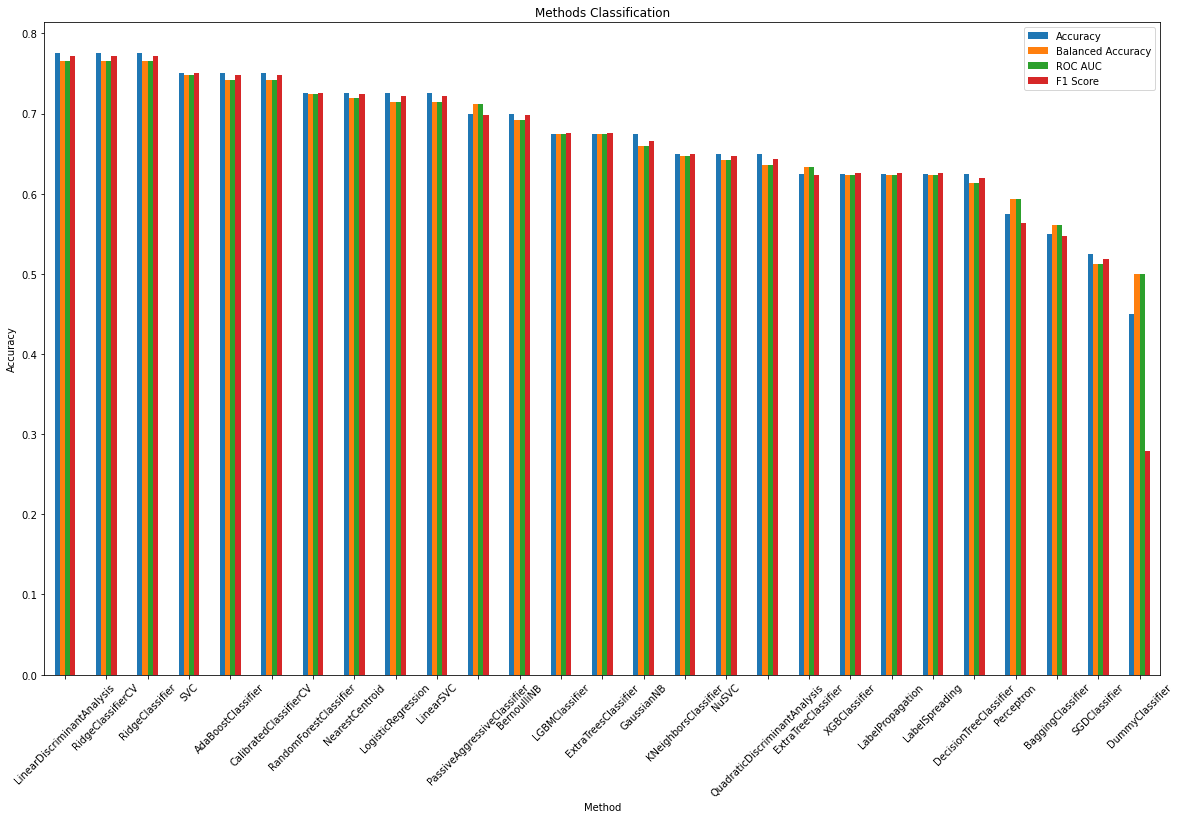

In [53]:
df_models = models[['Accuracy','Balanced Accuracy','ROC AUC', 'F1 Score']]
df_models.plot(kind='bar', figsize=(20, 12))

plt.xlabel("Method")
plt.xticks(rotation = 45)
plt.ylabel("Accuracy")
plt.title("Methods Classification")
          
plt.show()

Best evaluation with LinearDiscriminantAnalysis and RidgeClassifierCV, both with 78% accuracy.

## Authors

The dataset was extracted from Kaggle.
The data set is from the UCL Machine Learning Repository.
## Source:
Paulo Cortez, University of Minho, GuimarÃ£es, Portugal, http://www3.dsi.uminho.pt/pcortez
<br>
<br>Adapted by Érike de Oliveira Barbosa for the Course in Advanced Data Science - Capstone.

## Thank you